# Scoping:

Our plan is to use unsupervised learning (clustering) to cluster(συσταδοποιήσουμε) the customers and in the meanwhile to understand our data. So we have to model the dataset into a Customer Centric dataset.

## 1. Gather Data

### 1.1 Importing Libraries

In [663]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [664]:
dataset = pd.read_csv('/Users/liakooras/Desktop/Msc/CAPSTONE/Dataset (1).csv')

In [665]:
df = dataset.copy()

In [666]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/2023,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,2,27/2/2023,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,3,13/1/2023,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,4,20/4/2023,CUST004,Female,5.0,NaN,1.0,20.0,20.0
4,5,21/5/2023,CUST005,Male,37.0,Clothing,1.0,500.0,500.0


# 2. Clean Data

### 2.1 Check data types

In [669]:
#Checking for Dtype and fast look for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1050 non-null   int64  
 1   Date              1050 non-null   object 
 2   Customer ID       1050 non-null   object 
 3   Gender            1034 non-null   object 
 4   Age               1014 non-null   float64
 5   Product Category  1042 non-null   object 
 6   Quantity          1013 non-null   float64
 7   Price per Unit    1011 non-null   float64
 8   Total Amount      1009 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 74.0+ KB


In [670]:
#Number of observations : 1050 , Features: 9
df.shape

(1050, 9)

It seems that we have few issues :
- ['Date']  Type: object - Expected : DateTime


In [672]:
df.Date = pd.to_datetime(df['Date'])

/var/folders/kw/6d_1c0rj22d1pqvkf0fldhlm0000gn/T/ipykernel_24853/646020033.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.Date = pd.to_datetime(df['Date'])


In [673]:
# we good to go
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

### b. Resolve Data Issues : NaN's

Check for missing data, inconsistent text and typos, duplicate data and outliers.

In [1242]:
(37/1050)*100

3.5238095238095237

In [675]:
df.isna().sum()

Transaction ID       0
Date                 0
Customer ID          0
Gender              16
Age                 36
Product Category     8
Quantity            37
Price per Unit      39
Total Amount        41
dtype: int64

#### Age

In [677]:
df[df.isna().any(axis=1)]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
3,4,2023-04-20,CUST004,Female,5.0,NaN,1.0,20.0,20.0
15,16,2023-04-25,CUST016,Male,2.0,NaN,1.0,40.0,40.0
38,39,2023-03-21,CUST039,Female,NaN,Electronics,NaN,NaN,NaN
43,44,2023-04-21,CUST044,Male,NaN,Electronics,NaN,NaN,NaN
55,56,2023-02-10,CUST056,NaN,NaN,Beauty,NaN,NaN,NaN
60,61,2023-01-23,CUST061,NaN,NaN,Beauty,NaN,NaN,NaN
70,71,2023-07-05,CUST071,Female,NaN,Beauty,NaN,NaN,NaN
78,79,2023-01-23,CUST079,Female,NaN,Electronics,NaN,NaN,NaN
79,80,2023-02-10,CUST080,Male,NaN,Clothing,NaN,NaN,NaN
80,81,2023-10-10,CUST081,Male,NaN,Clothing,NaN,NaN,NaN


Here we can see also in 692 observation (index) that the we can replace the Quantity value with 2.

In [678]:
#Create a list just as a reminder
list=["Multiple NaN in a single row , on the last 3 Cols","Are the TransactionId and Customer Id the same?"]

In [679]:
df.Age.value_counts()

Age
 43.0    31
 64.0    31
 51.0    30
 57.0    30
 34.0    28
 54.0    28
 22.0    27
 62.0    27
 47.0    26
 42.0    26
 46.0    25
 23.0    25
 40.0    24
 27.0    23
 50.0    23
 60.0    23
 30.0    23
 28.0    22
 55.0    22
 31.0    22
 26.0    22
 35.0    22
 18.0    22
 52.0    22
 41.0    21
 19.0    21
 20.0    21
 25.0    21
 21.0    20
 49.0    19
 56.0    19
 38.0    19
 32.0    19
 61.0    18
 39.0    18
 48.0    18
 63.0    17
 53.0    17
 59.0    17
 45.0    17
 36.0    16
 37.0    16
 29.0    16
 44.0    16
 24.0    15
 58.0    14
 33.0    10
 2.0      1
 5.0      1
-8.0      1
 1.0      1
 0.0      1
Name: count, dtype: int64

In [680]:
df.Age.mean()

41.13510848126233

In [681]:
df.Age.mode()[0]

43.0

It seems like a good practise to fill those null values with the mode as the data a bit right skewed.
But near to the mean.

In [683]:
(16/1050)*100 # The percentage of the missing Age values, it wont make a big impact to our dataset

1.5238095238095237

In [869]:
age_mode=df.Age.mode()[0]
age_mode

43.0

<Axes: xlabel='Age', ylabel='Count'>

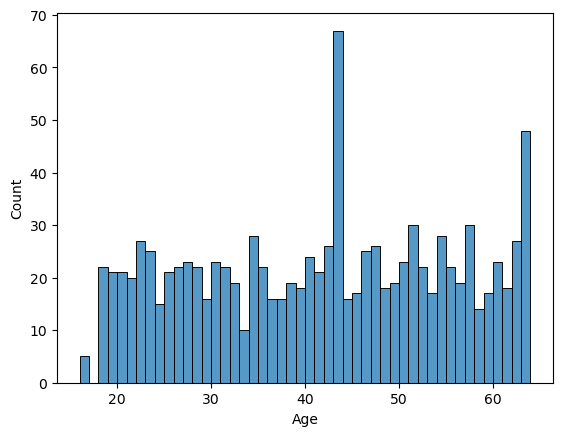

In [875]:
sns.histplot(df.Age,binwidth=1)

In [685]:
df.Age=df.Age.fillna(age_mode)

In [686]:
df.Age.isna().sum()

0

In [687]:
#Fixing outliers , it depends on the scoping whats the minimum Age for a Customer
df.loc[df['Age']< 16,'Age']=16

In [688]:
df.Age.value_counts()

Age
43.0    67
64.0    31
57.0    30
51.0    30
54.0    28
34.0    28
62.0    27
22.0    27
42.0    26
47.0    26
23.0    25
46.0    25
40.0    24
50.0    23
60.0    23
30.0    23
27.0    23
31.0    22
26.0    22
28.0    22
55.0    22
18.0    22
35.0    22
52.0    22
25.0    21
20.0    21
19.0    21
41.0    21
21.0    20
56.0    19
38.0    19
32.0    19
49.0    19
48.0    18
39.0    18
61.0    18
59.0    17
53.0    17
63.0    17
45.0    17
37.0    16
29.0    16
36.0    16
44.0    16
24.0    15
58.0    14
33.0    10
16.0     5
Name: count, dtype: int64

#### Gender

In [690]:
df.Gender.value_counts(dropna=False)

Gender
Female    524
Male      510
NaN        16
Name: count, dtype: int64

In [691]:
df.Gender=df.Gender.fillna('Male')

In [692]:
df.Gender.value_counts()

Gender
Male      526
Female    524
Name: count, dtype: int64

## Note

In [694]:
df.isna().sum()

Transaction ID       0
Date                 0
Customer ID          0
Gender               0
Age                  0
Product Category     8
Quantity            37
Price per Unit      39
Total Amount        41
dtype: int64

- For the Product Category : Its a categorical variable with 3 unique Values so we can use KNN Imputation in order to predict where those 8 missing values belong to.
- The Quantity - Price per Unit - Total Amount are in a relationship between them. So lets check the NaN and if we can restore the NaN values in every column from the other two. The main concern is that for every observation if the Values in 2 cols are known then we can fill the 3rd.
- Ill double checkup by this way the Total Amount Column for any inconsistencies by replacing the whole column with
- ['Total Amount'] = ['Quantity'] X ['Price per Unit']

#### Quantity

In [697]:
df.Quantity.value_counts(dropna=False)

Quantity
 4.0    264
 1.0    255
 2.0    243
 3.0    241
 NaN     37
 0.0      5
 5.0      2
-2.0      1
-1.0      1
-4.0      1
Name: count, dtype: int64

In [698]:
#From my point of view it worth replacing NaN with median
quantity_median = df['Quantity'].median()
quantity_median

3.0

In [699]:
df['Quantity']=df['Quantity'].fillna(quantity_median)

In [700]:
df.Quantity.value_counts(dropna=False)

Quantity
 3.0    278
 4.0    264
 1.0    255
 2.0    243
 0.0      5
 5.0      2
-2.0      1
-1.0      1
-4.0      1
Name: count, dtype: int64

In [701]:
# Fixing Outliers
df.loc[df['Quantity']<0,'Quantity']=3

<Axes: xlabel='Quantity', ylabel='Count'>

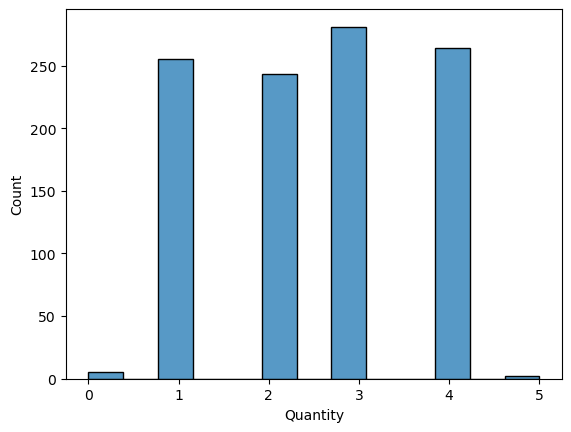

In [702]:
sns.histplot(df['Quantity'])

#### Price per Unit

In [704]:
df['Price per Unit'].value_counts(dropna=False)

Price per Unit
 50.0     211
 25.0     210
 500.0    199
 300.0    197
 30.0     183
 NaN       39
 20.0       4
-20.0       2
 40.0       1
 0.0        1
-30.0       1
 100.0      1
 10.0       1
Name: count, dtype: int64

In [705]:
price_mode=df['Price per Unit'].mode()[0]
price_mode

50.0

In [706]:
df['Price per Unit']=df['Price per Unit'].fillna(price_mode)

In [707]:
df['Price per Unit'].value_counts(dropna=False)

Price per Unit
 50.0     250
 25.0     210
 500.0    199
 300.0    197
 30.0     183
 20.0       4
-20.0       2
 40.0       1
 0.0        1
-30.0       1
 100.0      1
 10.0       1
Name: count, dtype: int64

In [708]:
#Ill fast replace the outlier with the absolut value that might have been --> 20 instead of -20

In [709]:
df.loc[df['Price per Unit']<0,'Price per Unit'] = 20

In [710]:
df['Price per Unit'].value_counts(dropna=False)

Price per Unit
50.0     250
25.0     210
500.0    199
300.0    197
30.0     183
20.0       7
40.0       1
0.0        1
100.0      1
10.0       1
Name: count, dtype: int64

### Total Amount

In [712]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,2,2023-02-27,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,3,2023-01-13,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,4,2023-04-20,CUST004,Female,16.0,NaN,1.0,20.0,20.0
4,5,2023-05-21,CUST005,Male,37.0,Clothing,1.0,500.0,500.0


In [713]:
df['Total Amount'] = df['Quantity'] * df['Price per Unit']

In [714]:
df['Total Amount'].value_counts(dropna=False)

Total Amount
50.0      116
100.0     109
150.0      77
200.0      62
900.0      62
1200.0     54
30.0       51
25.0       51
500.0      51
1500.0     50
1000.0     49
60.0       49
2000.0     49
300.0      47
90.0       44
120.0      43
75.0       43
600.0      35
0.0         5
40.0        1
20.0        1
80.0        1
Name: count, dtype: int64

In [811]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    8
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Product Category - KNN Imputation

Importing ML libraries

In [815]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer

In [817]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                        float64
Product Category            object
Quantity                   float64
Price per Unit             float64
Total Amount               float64
dtype: object

In [819]:
df3=df.copy()
df3.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,2,2023-02-27,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,3,2023-01-13,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,4,2023-04-20,CUST004,Female,16.0,NaN,1.0,20.0,20.0
4,5,2023-05-21,CUST005,Male,37.0,Clothing,1.0,500.0,500.0


In [821]:
#Folding, this helps us define that the "chances" are the same every time we run the code
np.random.seed(42)

In [823]:
# the indices that contain the NaN
missin_rows = df3[df3['Product Category'].isna()].index
missin_rows

Index([3, 15, 119, 539, 692, 763, 778, 880], dtype='int64')

In [825]:
le = LabelEncoder()

In [827]:
df3['Category_Encoded'] = le.fit_transform(df3['Product Category'].astype(str))

In [829]:
df3['Category_Encoded']

0       0
1       1
2       2
3       3
4       1
       ..
1045    1
1046    0
1047    0
1048    2
1049    2
Name: Category_Encoded, Length: 1050, dtype: int64

In [831]:
#reseting the Nan into encode column, in order to be user from fit_transform
df3.loc[missin_rows,'Category_Encoded']=np.nan

In [833]:
#Create dummy variables in Gender Column
df3 = pd.get_dummies(df3,columns=['Gender'], drop_first=True,dtype='int')

In [835]:
df3.head()

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,Category_Encoded,Gender_Male
0,1,2023-11-24,CUST001,34.0,Beauty,3.0,50.0,150.0,0.0,1
1,2,2023-02-27,CUST002,26.0,Clothing,2.0,500.0,1000.0,1.0,0
2,3,2023-01-13,CUST003,50.0,Electronics,1.0,30.0,30.0,2.0,1
3,4,2023-04-20,CUST004,16.0,NaN,1.0,20.0,20.0,NaN,0
4,5,2023-05-21,CUST005,37.0,Clothing,1.0,500.0,500.0,1.0,1


In [837]:
numeric_features = ['Age', 'Quantity', 'Price per Unit']

In [839]:
scaler = MinMaxScaler()

In [841]:
df3[numeric_features]=scaler.fit_transform(df3[numeric_features])

In [844]:
imputation_cols = numeric_features + ['Gender_Male', 'Category_Encoded']

In [846]:
imputer = KNNImputer(n_neighbors=3)

In [848]:
df3[imputation_cols] = imputer.fit_transform(df3[imputation_cols])

In [850]:
df3['Category_Encoded'] = df3['Category_Encoded'].round().astype(int)

In [852]:
imputed_categories=le.inverse_transform(df3['Category_Encoded'])

In [854]:
df3['Product Category Imputed']= imputed_categories

In [856]:
df3.head()

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,Category_Encoded,Gender_Male,Product Category Imputed
0,1,2023-11-24,CUST001,0.375000,Beauty,0.6,0.10,150.0,0,1.0,Beauty
1,2,2023-02-27,CUST002,0.208333,Clothing,0.4,1.00,1000.0,1,0.0,Clothing
2,3,2023-01-13,CUST003,0.708333,Electronics,0.2,0.06,30.0,2,1.0,Electronics
3,4,2023-04-20,CUST004,0.000000,NaN,0.2,0.04,20.0,1,0.0,Clothing
4,5,2023-05-21,CUST005,0.437500,Clothing,0.2,1.00,500.0,1,1.0,Clothing


In [858]:
df3['Product Category'] = df3['Product Category Imputed']

In [860]:
df3.head()

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,Category_Encoded,Gender_Male,Product Category Imputed
0,1,2023-11-24,CUST001,0.375000,Beauty,0.6,0.10,150.0,0,1.0,Beauty
1,2,2023-02-27,CUST002,0.208333,Clothing,0.4,1.00,1000.0,1,0.0,Clothing
2,3,2023-01-13,CUST003,0.708333,Electronics,0.2,0.06,30.0,2,1.0,Electronics
3,4,2023-04-20,CUST004,0.000000,Clothing,0.2,0.04,20.0,1,0.0,Clothing
4,5,2023-05-21,CUST005,0.437500,Clothing,0.2,1.00,500.0,1,1.0,Clothing


In [862]:
df3=df3.drop(columns='Product Category Imputed')

In [864]:
df3.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Category_Encoded    0
Gender_Male         0
dtype: int64

### c. Duplicates

In [893]:
df3[df3.duplicated(keep=False)]

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,Category_Encoded,Gender_Male


The are no duplicated values.

In [898]:
list.pop(0)

'Multiple NaN in a single row , on the last 3 Cols'

## 3. Exploratory Data Analysis & Feature Engineering

In [901]:
df3.head()

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,Category_Encoded,Gender_Male
0,1,2023-11-24,CUST001,0.375000,Beauty,0.6,0.10,150.0,0,1.0
1,2,2023-02-27,CUST002,0.208333,Clothing,0.4,1.00,1000.0,1,0.0
2,3,2023-01-13,CUST003,0.708333,Electronics,0.2,0.06,30.0,2,1.0
3,4,2023-04-20,CUST004,0.000000,Clothing,0.2,0.04,20.0,1,0.0
4,5,2023-05-21,CUST005,0.437500,Clothing,0.2,1.00,500.0,1,1.0


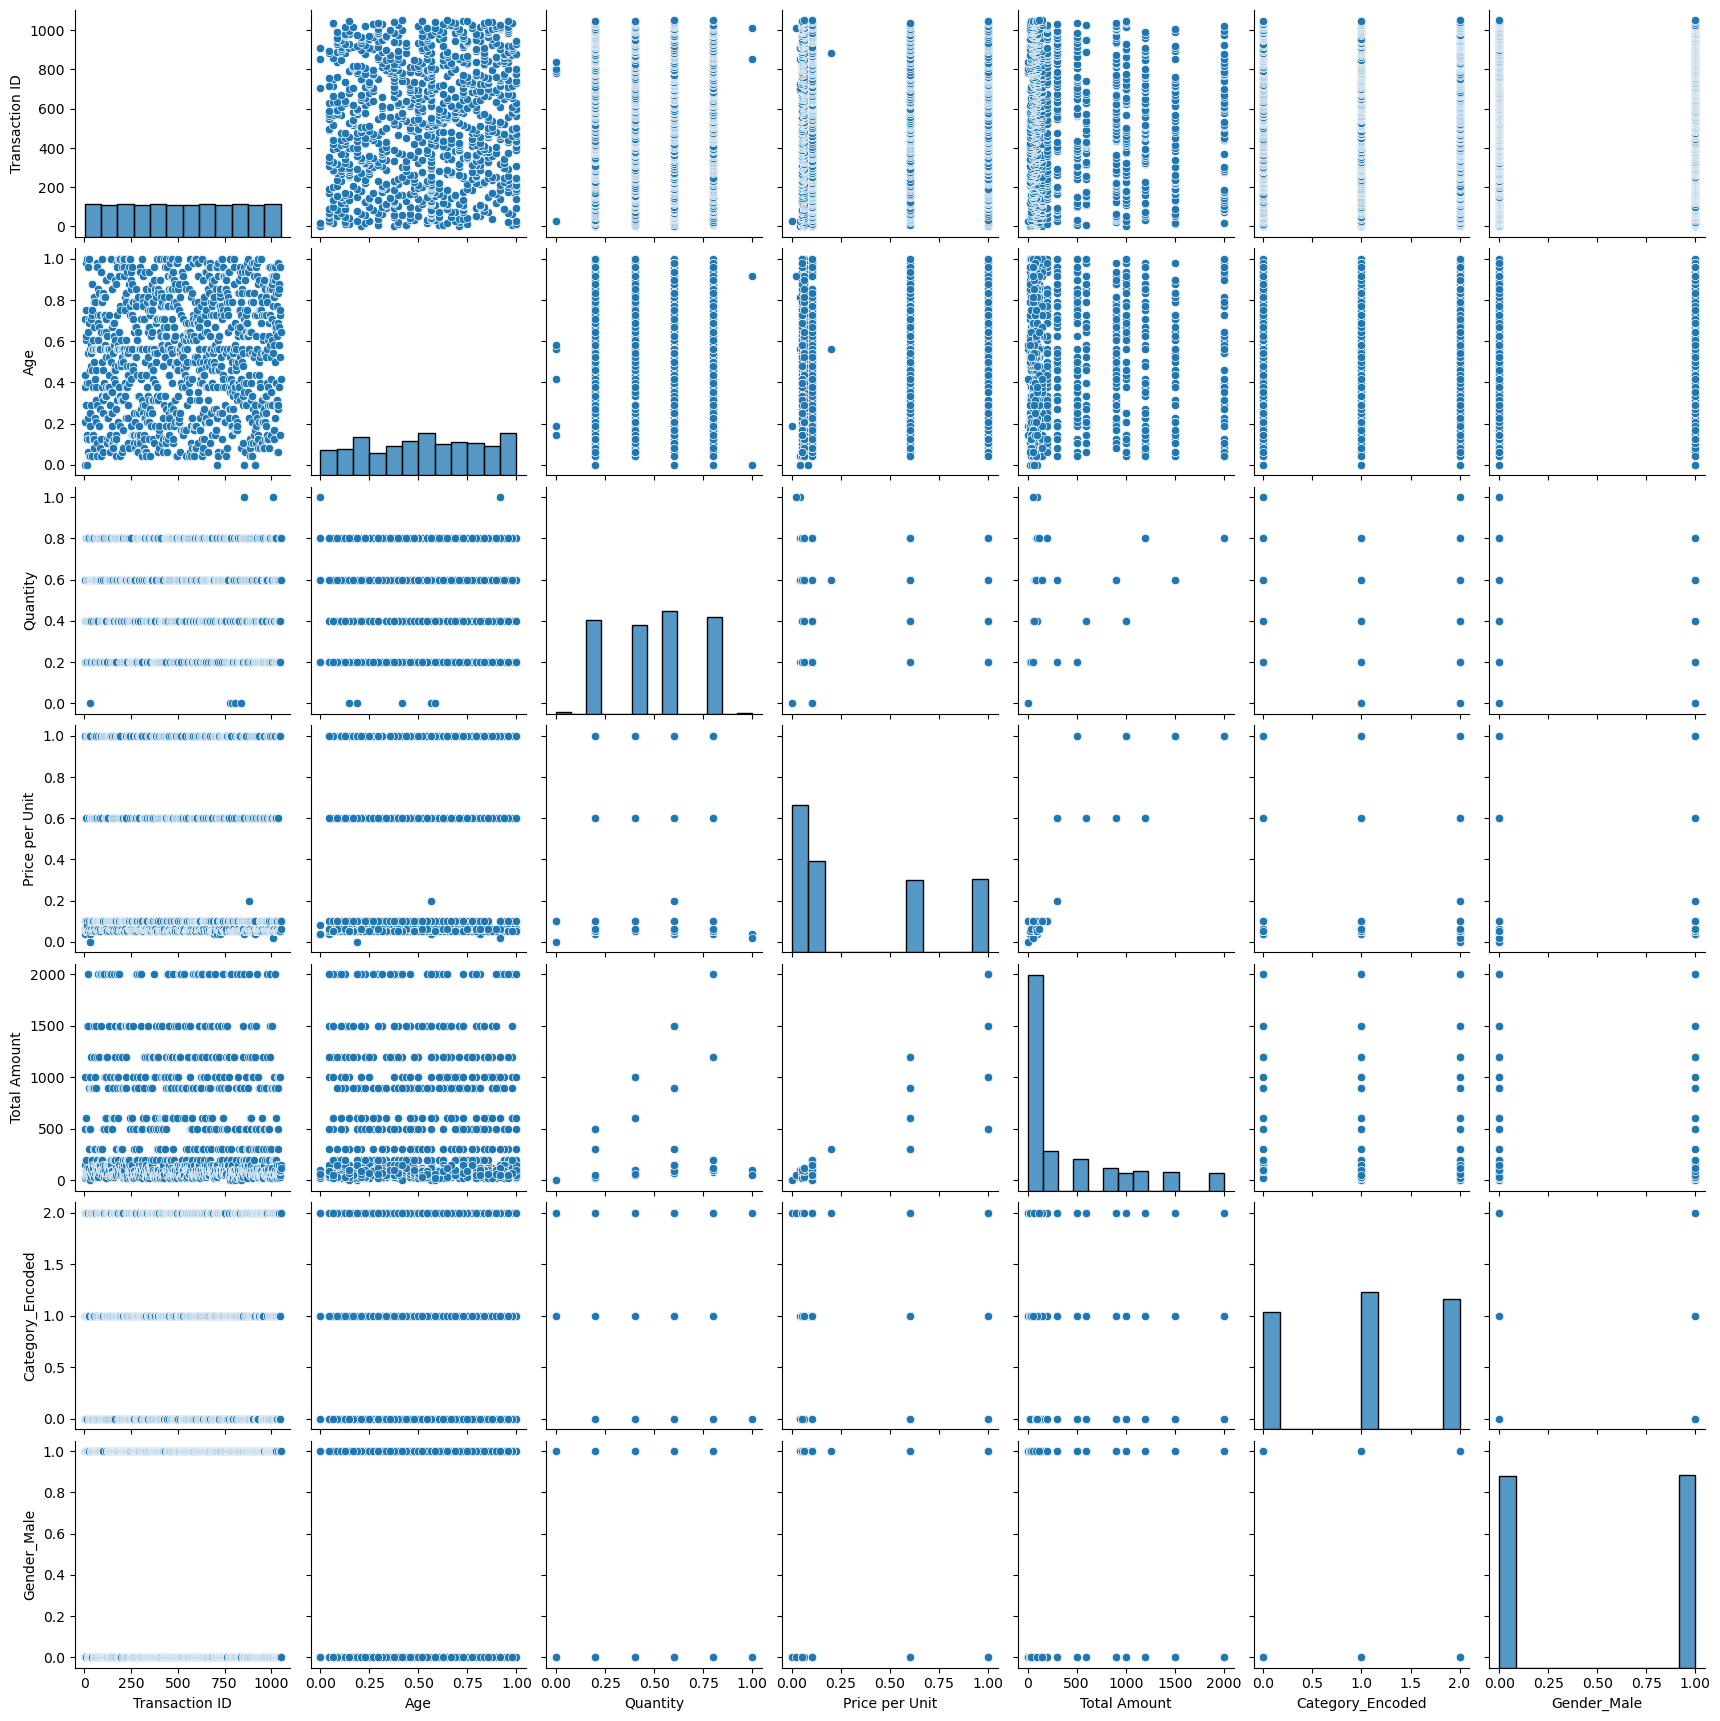

In [903]:
sns.pairplot(df3)

In [905]:
df3.corr(numeric_only=True)

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Category_Encoded,Gender_Male
Transaction ID,1.000000,0.065024,-0.028686,-0.043397,-0.060592,0.040092,0.005090
Age,0.065024,1.000000,-0.015897,-0.030352,-0.052628,0.034814,0.005098
Quantity,-0.028686,-0.015897,1.000000,0.010880,0.360064,-0.016613,-0.022786
Price per Unit,-0.043397,-0.030352,0.010880,1.000000,0.854527,-0.001983,-0.014885
Total Amount,-0.060592,-0.052628,0.360064,0.854527,1.000000,-0.004490,-0.012687
Category_Encoded,0.040092,0.034814,-0.016613,-0.001983,-0.004490,1.000000,0.028433
Gender_Male,0.005090,0.005098,-0.022786,-0.014885,-0.012687,0.028433,1.000000


# Correlation:
- ['Price per Unit'] with ['Total Amount'] : corr = 0.85, There is a huge positive correlation between those 2.
- ['Quantity'] with ['Total Amount'] : corr = 0.360 , Also an important positive correlation.

In [921]:
num_cols = ['Transaction ID', 'Date', 'Customer ID', 'Age', 'Product Category', 'Quantity', 
            'Price per Unit', 'Total Amount', 'Category_Encoded', 'Gender_Male']

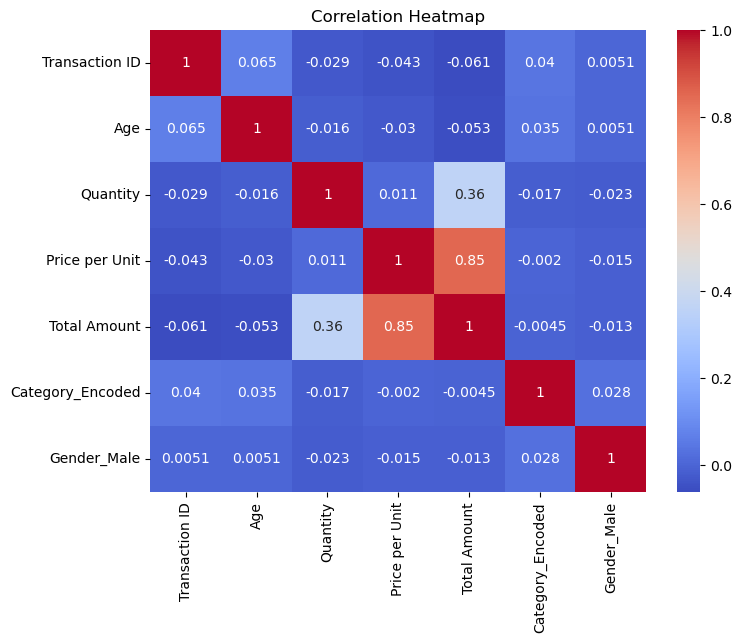

In [923]:
plt.figure(figsize=(8,6))
sns.heatmap(df3[num_cols].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

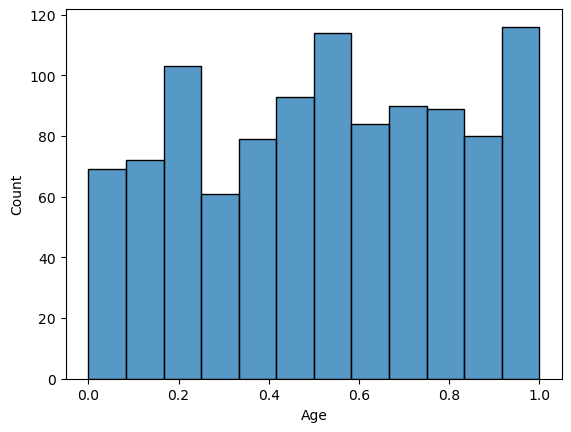

In [908]:
sns.histplot(df3['Age'])

In [911]:
df3.head()

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,Category_Encoded,Gender_Male
0,1,2023-11-24,CUST001,0.375000,Beauty,0.6,0.10,150.0,0,1.0
1,2,2023-02-27,CUST002,0.208333,Clothing,0.4,1.00,1000.0,1,0.0
2,3,2023-01-13,CUST003,0.708333,Electronics,0.2,0.06,30.0,2,1.0
3,4,2023-04-20,CUST004,0.000000,Clothing,0.2,0.04,20.0,1,0.0
4,5,2023-05-21,CUST005,0.437500,Clothing,0.2,1.00,500.0,1,1.0


#### Note Beauty:0 Clothing:1 Electronics:2
From the pairplot it seems there is no skewness into our data spread

In [928]:
df4=df3.copy()

In [930]:
df4['Product Category'] = df4['Category_Encoded']

In [932]:
df4.head()

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,Category_Encoded,Gender_Male
0,1,2023-11-24,CUST001,0.375000,0,0.6,0.10,150.0,0,1.0
1,2,2023-02-27,CUST002,0.208333,1,0.4,1.00,1000.0,1,0.0
2,3,2023-01-13,CUST003,0.708333,2,0.2,0.06,30.0,2,1.0
3,4,2023-04-20,CUST004,0.000000,1,0.2,0.04,20.0,1,0.0
4,5,2023-05-21,CUST005,0.437500,1,0.2,1.00,500.0,1,1.0


In [938]:
df4=df4.drop(columns=['Category_Encoded'])

In [940]:
df4.head()

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,Gender_Male
0,1,2023-11-24,CUST001,0.375000,0,0.6,0.10,150.0,1.0
1,2,2023-02-27,CUST002,0.208333,1,0.4,1.00,1000.0,0.0
2,3,2023-01-13,CUST003,0.708333,2,0.2,0.06,30.0,1.0
3,4,2023-04-20,CUST004,0.000000,1,0.2,0.04,20.0,0.0
4,5,2023-05-21,CUST005,0.437500,1,0.2,1.00,500.0,1.0


In [985]:
#replaced the prefix CUST in order to have only numeric values
df4['Customer ID']=df4['Customer ID'].str.replace('CUST','')

In [993]:
df4['Customer ID']=pd.to_numeric(df4['Customer ID'])

In [995]:
df4.dtypes

Transaction ID             int64
Date              datetime64[ns]
Customer ID                int64
Age                      float64
Quantity                 float64
Price per Unit           float64
Total Amount             float64
Gender_Male              float64
0                          int64
1                          int64
2                          int64
dtype: object

#### -  Frequency

In [997]:
df4.groupby('Customer ID')['Transaction ID'].count().reset_index()

,Customer ID,Transaction ID
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
1045,1046,1
1046,1047,1
1047,1048,1
1048,1049,1


It looks like the leftover dataset have only 1 transaction per Customer so we cant see who is a frequent client

#### - How much money every customer Spent

In [1008]:
df4.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).reset_index()

,Customer ID,Total Amount
0,579,2000.0
1,186,2000.0
2,106,2000.0
3,661,2000.0
4,740,2000.0
...,...,...
1045,792,0.0
1046,30,0.0
1047,779,0.0
1048,804,0.0


#### - Which Category is the most profitable

In [1023]:
df3.head()

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,Category_Encoded,Gender_Male
0,1,2023-11-24,CUST001,0.375000,Beauty,0.6,0.10,150.0,0,1.0
1,2,2023-02-27,CUST002,0.208333,Clothing,0.4,1.00,1000.0,1,0.0
2,3,2023-01-13,CUST003,0.708333,Electronics,0.2,0.06,30.0,2,1.0
3,4,2023-04-20,CUST004,0.000000,Clothing,0.2,0.04,20.0,1,0.0
4,5,2023-05-21,CUST005,0.437500,Clothing,0.2,1.00,500.0,1,1.0


<Axes: xlabel='Product Category'>

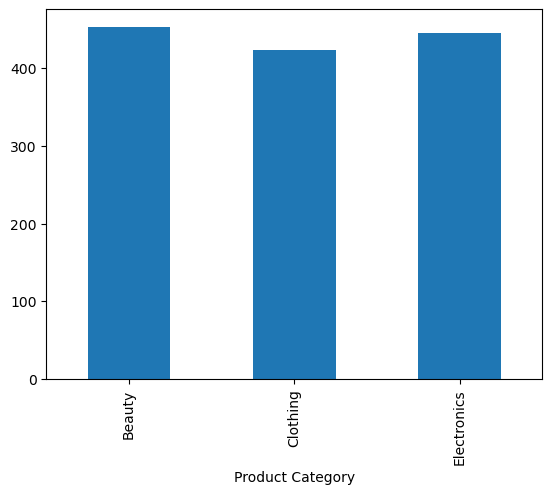

In [1025]:
df3.groupby('Product Category')['Total Amount'].mean().plot.bar()

### - Whice gender spents more

<Axes: xlabel='Gender_Male'>

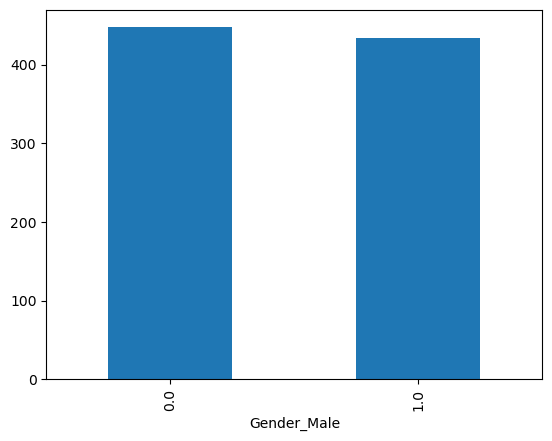

In [1031]:
df3.groupby('Gender_Male')['Total Amount'].mean().plot.bar()

It seems that women spend a bit more than Men

### -Which Age spend more

I'll map the ages later in Modeling so the second plot will be easier to understanding

age_mapping={ 

0: 16-20,

1: 20-29,

2: 30-39,

3: 40-49,

4: 50-59,

5: 60-65

}

<Axes: xlabel='Age'>

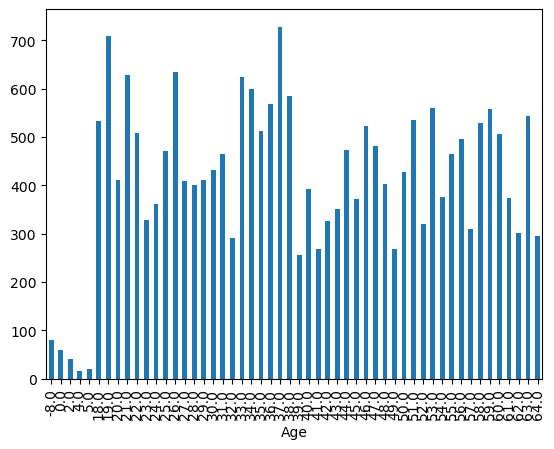

In [1050]:
df2.groupby('Age')['Total Amount'].mean().plot.bar()

In [1072]:
df.Age.max()

64.0

In [1070]:
df.Age.min()

16.0

In [1078]:
df['Age_Mapped'] = df['Age'].apply(map_age_to_bin)

In [1076]:
def map_age_to_bin(age):
    if 16 <= age <= 20:
        return 0
    elif 21 <= age <= 29:
        return 1
    elif 30 <= age <= 39:
        return 2
    elif 40 <= age <= 49:
        return 3
    elif 50 <= age <= 59:
        return 4
    elif 60 <= age <= 65:
        return 5
    else:
        return None

In [1080]:
df['Age_Mapped'].value_counts().sort_index()

Age_Mapped
0     69
1    191
2    193
3    259
4    222
5    116
Name: count, dtype: int64

<Axes: xlabel='Age_Mapped'>

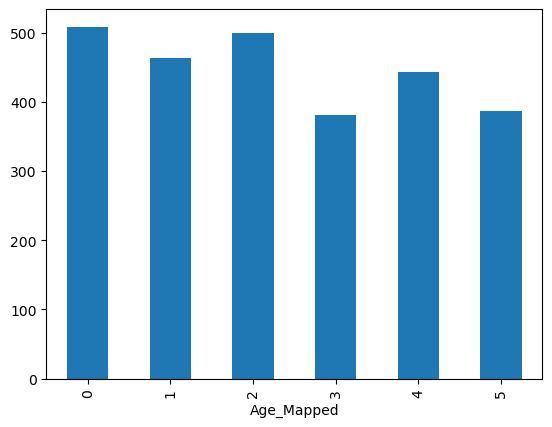

In [1086]:
df.groupby('Age_Mapped')['Total Amount'].mean().plot.bar()

### - Total Sales per Month

In [1056]:
monthly_sales = df4.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()b

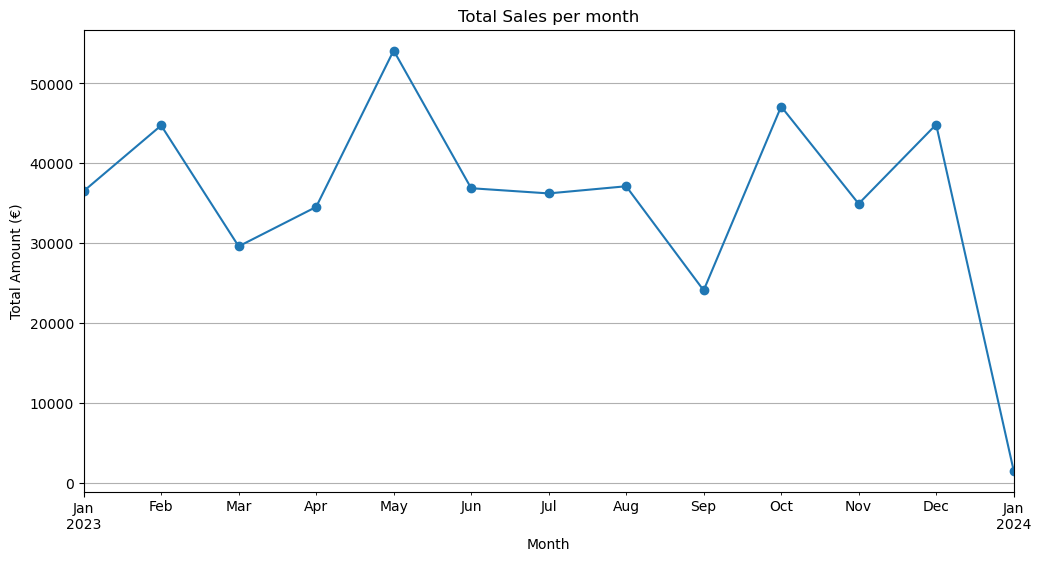

In [1058]:
monthly_sales.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Total Sales per month')
plt.ylabel('Total Amount (€)')
plt.xlabel('Month')
plt.grid(True) 
plt.show()

Observations:

Peak at May (maybe due to Easter holidays)
Large amounts of sales at February (discount period), as well as while we are heading to Christmas.
Very low amount on January, maybe due to incomplete data.

## Data Modeling & Creation of new Columns

#### I'll create dummy variables for Product Category

In [ ]:
category_dummies=pd.get_dummies(df4['Product Category'],dtype='int')


In [974]:
df4=pd.concat([df4,category_dummies],axis=1)

In [980]:
df4=df4.drop(columns='Product Category')

In [1089]:
df4.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Male,0,1,2
0,1,2023-11-24,1,0.375000,0.6,0.10,150.0,1.0,1,0,0
1,2,2023-02-27,2,0.208333,0.4,1.00,1000.0,0.0,0,1,0
2,3,2023-01-13,3,0.708333,0.2,0.06,30.0,1.0,0,0,1
3,4,2023-04-20,4,0.000000,0.2,0.04,20.0,0.0,0,1,0
4,5,2023-05-21,5,0.437500,0.2,1.00,500.0,1.0,0,1,0


### Another useful col for modeling is to calculate the days from "today" 

In [1095]:
last_purchase = df4.groupby('Customer ID')['Date'].max()
last_purchase.head(2)

Customer ID
1   2023-11-24
2   2023-02-27
Name: Date, dtype: datetime64[ns]

In [1103]:
#Im setting 2024-01-01 as "Todays" Date because we have old Sales dates
today=pd.Series(pd.to_datetime('2024-01-01'),index=last_purchase.index)
today.head(2)

Customer ID
1   2024-01-01
2   2024-01-01
dtype: datetime64[ns]

In [1105]:
days_between = (today - last_purchase).dt.days.rename('days_between')


In [1244]:
days_between.head(20)

Customer ID
1      38
2     308
3     353
4     256
5     225
6     240
7     251
8     294
9     313
10     19
11     86
12    321
13     63
14    149
15    349
16    251
17    350
18    318
19    254
20    246
Name: days_between, dtype: int64

In [1109]:
df4.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Male,0,1,2
0,1,2023-11-24,1,0.375000,0.6,0.10,150.0,1.0,1,0,0
1,2,2023-02-27,2,0.208333,0.4,1.00,1000.0,0.0,0,1,0
2,3,2023-01-13,3,0.708333,0.2,0.06,30.0,1.0,0,0,1
3,4,2023-04-20,4,0.000000,0.2,0.04,20.0,0.0,0,1,0
4,5,2023-05-21,5,0.437500,0.2,1.00,500.0,1.0,0,1,0


In [1113]:
#adding it to the model df : df4 with left join

In [1119]:
df4=df4.merge(days_between,how='left',on='Customer ID')

In [1121]:
df4.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Male,0,1,2,days_between
0,1,2023-11-24,1,0.375000,0.6,0.10,150.0,1.0,1,0,0,38
1,2,2023-02-27,2,0.208333,0.4,1.00,1000.0,0.0,0,1,0,308
2,3,2023-01-13,3,0.708333,0.2,0.06,30.0,1.0,0,0,1,353
3,4,2023-04-20,4,0.000000,0.2,0.04,20.0,0.0,0,1,0,256
4,5,2023-05-21,5,0.437500,0.2,1.00,500.0,1.0,0,1,0,225


In [1127]:
df4=df4.drop(columns='Date')

In [1129]:
df4.head()

,Transaction ID,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Male,0,1,2,days_between
0,1,1,0.375000,0.6,0.10,150.0,1.0,1,0,0,38
1,2,2,0.208333,0.4,1.00,1000.0,0.0,0,1,0,308
2,3,3,0.708333,0.2,0.06,30.0,1.0,0,0,1,353
3,4,4,0.000000,0.2,0.04,20.0,0.0,0,1,0,256
4,5,5,0.437500,0.2,1.00,500.0,1.0,0,1,0,225


In [1131]:
df_for_clustering=df4.copy()

In [1133]:
df_for_clustering.head()

,Transaction ID,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Male,0,1,2,days_between
0,1,1,0.375000,0.6,0.10,150.0,1.0,1,0,0,38
1,2,2,0.208333,0.4,1.00,1000.0,0.0,0,1,0,308
2,3,3,0.708333,0.2,0.06,30.0,1.0,0,0,1,353
3,4,4,0.000000,0.2,0.04,20.0,0.0,0,1,0,256
4,5,5,0.437500,0.2,1.00,500.0,1.0,0,1,0,225


In [ ]:
Beauty Clothing Electronics

In [1153]:
df_for_clustering.rename(columns={'Gender_Male':'Gender',0: 'Beauty', 1: 'Clothing', 2: 'Electronics'}, inplace=True)

In [1155]:
df_for_clustering.head()

,Transaction ID,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender,Beauty,Clothing,Electronics,days_between
0,1,1,0.375000,0.6,0.10,150.0,1.0,1,0,0,38
1,2,2,0.208333,0.4,1.00,1000.0,0.0,0,1,0,308
2,3,3,0.708333,0.2,0.06,30.0,1.0,0,0,1,353
3,4,4,0.000000,0.2,0.04,20.0,0.0,0,1,0,256
4,5,5,0.437500,0.2,1.00,500.0,1.0,0,1,0,225


In [1157]:
#i will remove transaction id because its not useful into clustering

In [1161]:
df_for_clustering=df_for_clustering.drop(columns='Transaction ID')

In [1163]:
df_for_clustering.head()

,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender,Beauty,Clothing,Electronics,days_between
0,1,0.375000,0.6,0.10,150.0,1.0,1,0,0,38
1,2,0.208333,0.4,1.00,1000.0,0.0,0,1,0,308
2,3,0.708333,0.2,0.06,30.0,1.0,0,0,1,353
3,4,0.000000,0.2,0.04,20.0,0.0,0,1,0,256
4,5,0.437500,0.2,1.00,500.0,1.0,0,1,0,225


Now Ill normalize ['Total Amount']

In [1166]:
scaler_total_amount=MinMaxScaler()

In [1170]:
df_for_clustering['Total Amount']=scaler_total_amount.fit_transform(df_for_clustering[['Total Amount']])

In [1172]:
df_for_clustering.head()

,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender,Beauty,Clothing,Electronics,days_between
0,1,0.375000,0.6,0.10,0.075,1.0,1,0,0,38
1,2,0.208333,0.4,1.00,0.500,0.0,0,1,0,308
2,3,0.708333,0.2,0.06,0.015,1.0,0,0,1,353
3,4,0.000000,0.2,0.04,0.010,0.0,0,1,0,256
4,5,0.437500,0.2,1.00,0.250,1.0,0,1,0,225


Now I'll normalize ['days_between']

In [1178]:
scaler_days= MinMaxScaler()

In [1182]:
df_for_clustering['days_between']=scaler_days.fit_transform(df_for_clustering[['days_between']])

In [1184]:
df_for_clustering.head()

,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender,Beauty,Clothing,Electronics,days_between
0,1,0.375000,0.6,0.10,0.075,1.0,1,0,0,0.104110
1,2,0.208333,0.4,1.00,0.500,0.0,0,1,0,0.843836
2,3,0.708333,0.2,0.06,0.015,1.0,0,0,1,0.967123
3,4,0.000000,0.2,0.04,0.010,0.0,0,1,0,0.701370
4,5,0.437500,0.2,1.00,0.250,1.0,0,1,0,0.616438


## 4. Machine Learning
- We can't approach the RFM analysis model because
- frequency = 1 for every client
- I'll find the best clusters number (k)

In [1205]:
from sklearn.cluster import KMeans

In [1197]:
features = [
    'Age',
    'Quantity',
    'Price per Unit',
    'Total Amount',
    'Gender',
    'Beauty',
    'Clothing',
    'Electronics',
    'days_between'
]

In [1199]:
X= df_for_clustering[features]

In [1201]:
#elbow
wcss=[] #within- cluster sum of Squares
k_range=range(1,11) #I'll try in a range till 10 clusters

In [1209]:
for k in k_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42,n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia is the wcss for the specific k

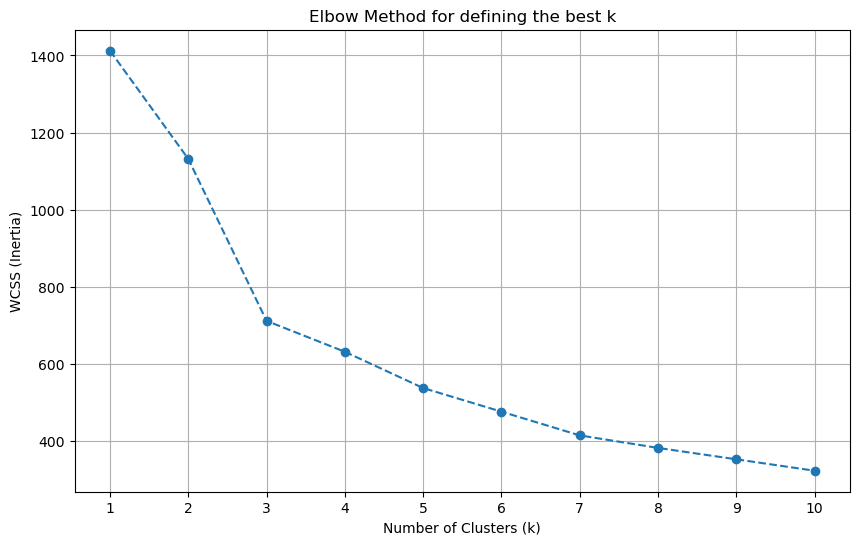

In [1211]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for defining the best k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Λίγα λόγια: Inertia = πόσο πυκνά ή συμπαγή είναι τα clusters που δημιουργούνται. Ουσιαστικά Για κάθε σημείο των δεδομένων υπολογίζεται το square distance από το centroid του cluster στο οποίο ανήκει. Έπειτα αυτές οι τετραγωνικές αποστάσεις αθροίζονται για όλα τα σημεία μέσα σε κάθε cluster. Και τέλος το Inertia είναι το συνολικό άθροισμα αυτών των αθροισμάτων από όλα τα clusters. Εκεί που η καμπύλη γίνεται μυτερή είναι ο αγκώνας και είναι το βέλτιστο κ, εκει που δηλαδή όσο μεγαλώνει το cluster μικραίνει το inertia ομαλα.

### Training model KMeans for k=3

In [1215]:
kmeans_final = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init='auto')
kmeans_final.fit(X)

KMeans(n_clusters=3, random_state=42)

In [1217]:
cluster_labels = kmeans_final.labels_

In [1221]:
# adding it to the df

In [1219]:
df_for_clustering['Cluster']=cluster_labels

In [1223]:
df_for_clustering.head()

,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender,Beauty,Clothing,Electronics,days_between,Cluster
0,1,0.375000,0.6,0.10,0.075,1.0,1,0,0,0.104110,2
1,2,0.208333,0.4,1.00,0.500,0.0,0,1,0,0.843836,0
2,3,0.708333,0.2,0.06,0.015,1.0,0,0,1,0.967123,1
3,4,0.000000,0.2,0.04,0.010,0.0,0,1,0,0.701370,0
4,5,0.437500,0.2,1.00,0.250,1.0,0,1,0,0.616438,0


In [1229]:
cluster_analysis = df_for_clustering.groupby('Cluster')[features].mean()
cluster_analysis

,Age,Quantity,Price per Unit,Total Amount,Gender,Beauty,Clothing,Electronics,days_between
Cluster,,,,,,,,,
0,0.537377,0.508021,0.332914,0.211564,0.521390,0.0,1.0,0.0,0.540166
1,0.532512,0.498592,0.353408,0.223035,0.507042,0.0,0.0,1.0,0.467822
2,0.507399,0.507788,0.356044,0.226597,0.470405,1.0,0.0,0.0,0.502983


### Key Findings:

#### Cluster 1: The customers that are buying *clothing*, spend less comparative to the other Categories, they are keen on products with cheaper Price per Unit and their purchases are not that recent.

#### Cluster 2: The customers that are buying *electronics* , made their purchases recently, the amount of money they spent is in the mid.

#### Cluster 3: The customers that are buying *Beauty Products* ,slightly more young aged women, tend to spend more in products with high Price per Unit. 